In [2]:
import os
from collections import Counter, defaultdict

import h5py
import cv2
import scipy.cluster
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches

from vsim_common import load_vocabulary, descriptors_to_bow_vector, load_SIFT_file

%matplotlib notebook

In [3]:
DATASET_DIR = '/home/hannes/Datasets/narrative2/'

Removing 300 least and 750 most occuring words in database


<IPython.core.display.Javascript object>


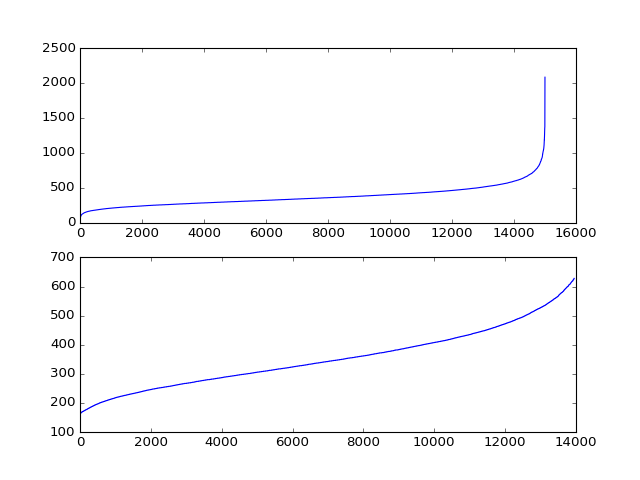

In [469]:

            

database_data = [
                 'db_sift_15k.h5',
                 #'db_sift_10k.h5',
                 #'db_sift_5k.h5',
                 #'db_sift_2k.h5',
                ]

databases = [VisualDatabase.from_file(db_path, stop_bottom=0.05, stop_top=0.02) for db_path in database_data]
db = MultiVisualDatabase(databases)

In [461]:
db._log_idf.shape

(10500,)

In [478]:
#matches = db.query_image(test_image, roi, sift_file=test_sift_file, method='max')
matches = db.query_image(test_image, roi, sift_file=test_sift_file)

Loading SIFT features from /home/hannes/Datasets/narrative2/20161129_094450_000.sift.h5
Found 22366 SIFT keypoints
Features in ROI: 162
Calculating BOW vector


In [471]:
with open(os.path.join(DATASET_DIR, 'labels.txt'), 'r') as f:
    label_dict = {}
    for line in f.readlines():
        filename, *labels = line.split()
        label_dict[filename] = labels

<IPython.core.display.Javascript object>


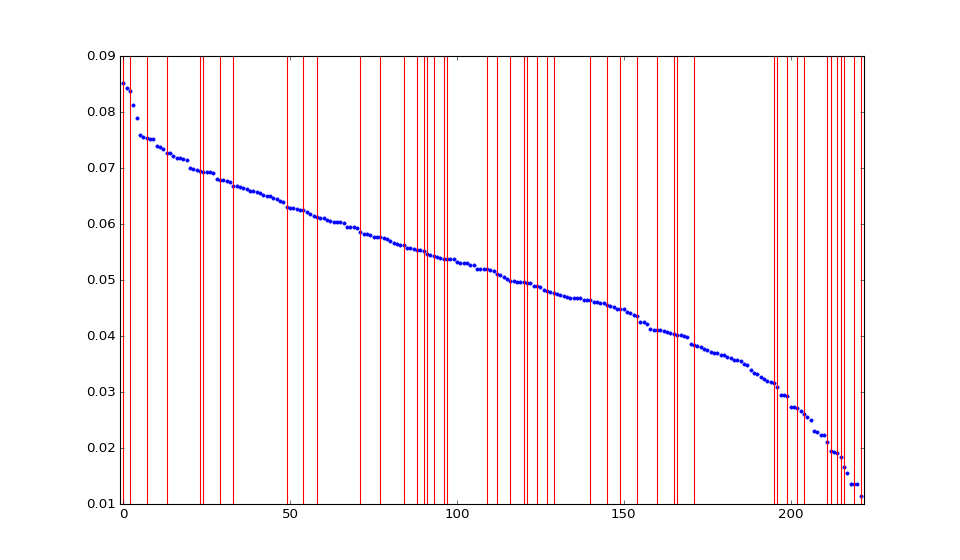

(-1, 222)

In [479]:
colors = ['r' if 'H' in label_dict[fname + '.jpg'] else 'k' for fname, score in matches]
plt.figure(figsize=(12, 7))
scores = [score for fname, score in matches]
plt.plot(np.arange(len(scores)), scores, '.')
for i, (fname, score) in enumerate(matches):
    if 'H' in label_dict[fname + '.jpg']:
        plt.axvline(i, color='r')
plt.xlim(xmin=-1, xmax=len(scores))

<IPython.core.display.Javascript object>


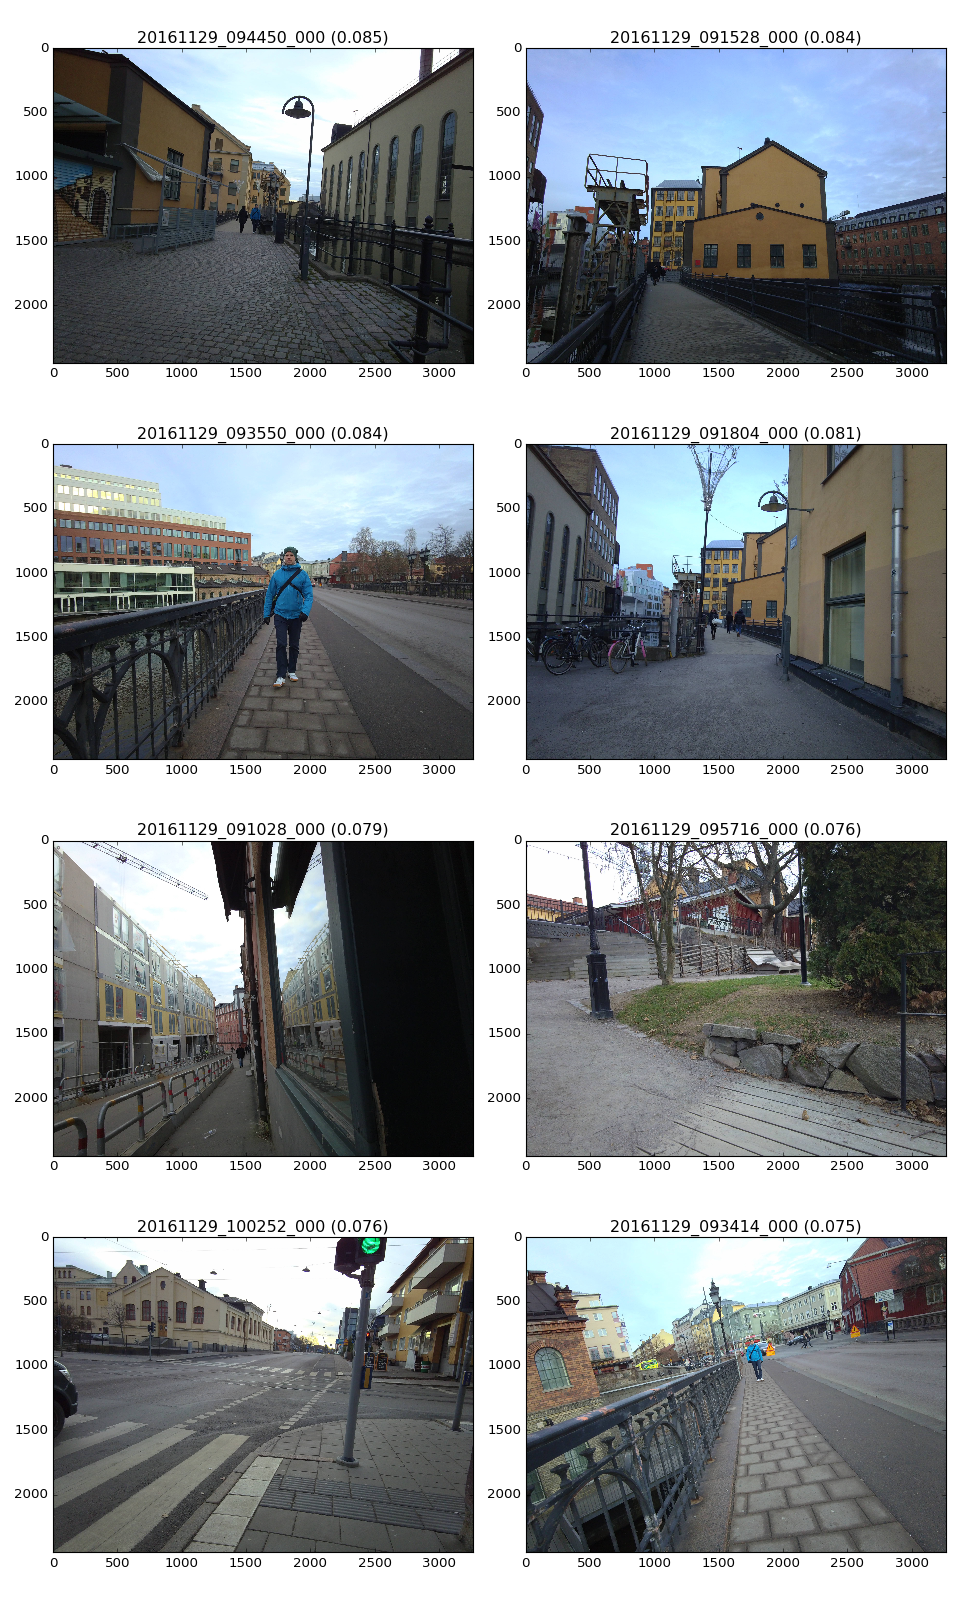

In [480]:
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows))
for ax, (fname, score) in zip(axes.flatten(), matches):
    image = plt.imread(os.path.join(DATASET_DIR, fname + '.jpg'))
    ax.imshow(image)
    ax.set_title("{} ({:.3f})".format(fname, score))
fig.tight_layout()

<IPython.core.display.Javascript object>


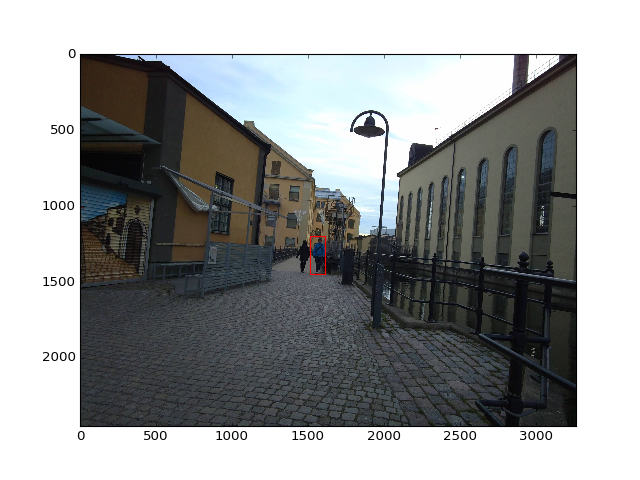

In [477]:
test_filename = '/home/hannes/Datasets/narrative2/20161129_094450_000.jpg'
#test_filename = '/home/hannes/Datasets/narrative2/20161129_094114_000.jpg'
test_sift_file = os.path.splitext(test_filename)[0] + '.sift.h5'
test_image = cv2.imread(test_filename)
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
rois = {'20161129_094450_000.jpg': [1515, 1200, 100, 250], # x, y, w, h
        '20161129_094114_000.jpg': [1100, 860, 450, 1040]}
roi = rois.get(os.path.split(test_filename)[-1], None)

if roi:
    rect = matplotlib.patches.Rectangle(roi[:2], roi[2], roi[3], facecolor='none', edgecolor='r')
    ax.add_patch(rect)
